# Forecast the Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
airline = pd.read_excel("Airlines+Data.xlsx")

In [3]:
airline

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
airline.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [5]:
airline.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [6]:
airline.columns = ['Month', 'Passengers']
airline['Month'] = pd.to_datetime(airline['Month'], format='%Y-%m')
airline = airline.set_index('Month')
airline.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [7]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [8]:
airline.isnull().sum()

Passengers    0
dtype: int64

In [9]:
airline.duplicated().sum()

16

# Plot Time Series Data

<AxesSubplot:xlabel='Month'>

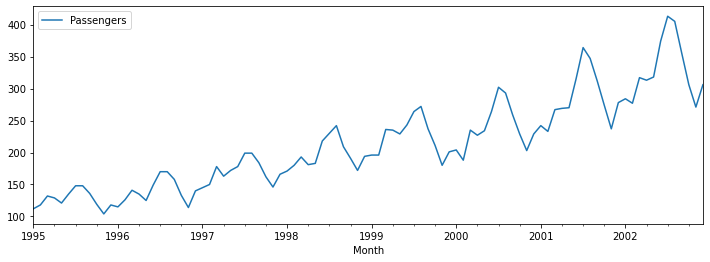

In [10]:
airline.plot(figsize=(12,4))

# Box Plot For Outlier Detection

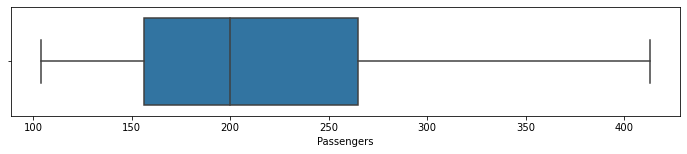

In [11]:
fig = plt.subplots(figsize=(12,2))
ax = sns.boxplot(airline['Passengers'])

# Histogram

<AxesSubplot:>

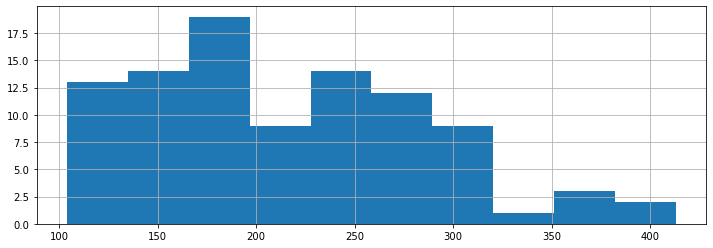

In [12]:
airline['Passengers'].hist(figsize=(12,4))

# Time Series Decomposition

## Additive Seasonal Decomposition

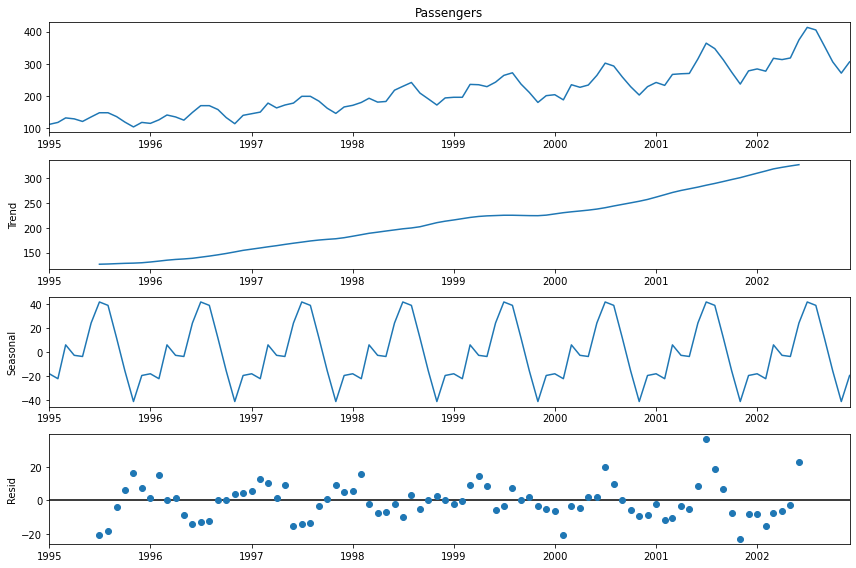

In [13]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(airline['Passengers'], model='additive')
fig = decomposition.plot()
plt.show()


## Multiplicative Seasonal Decomposition

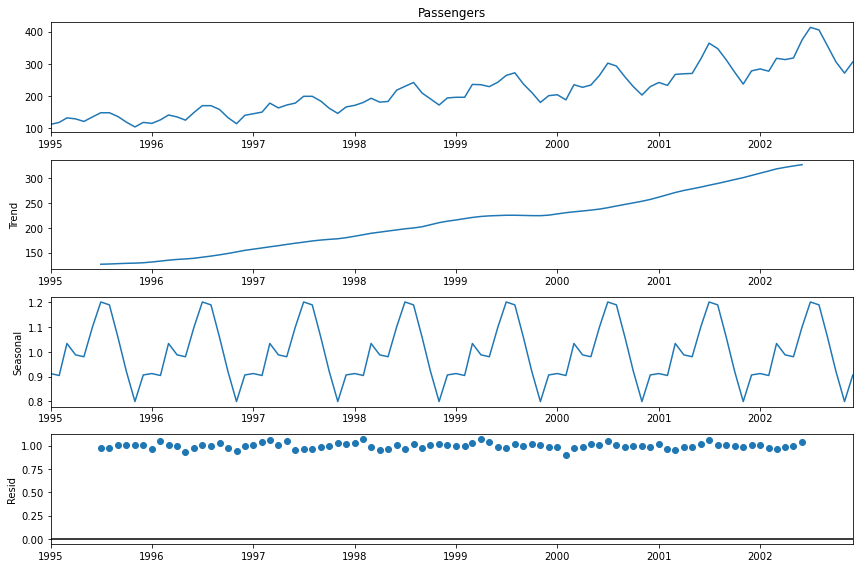

In [14]:
decomposition = sm.tsa.seasonal_decompose(airline['Passengers'], model='multiplicative')
fig = decomposition.plot()
plt.show()

# Spliting the data into Train and Test

In [15]:
train_len = 72
train = airline[0:train_len]
test = airline[train_len:]

In [16]:
train.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [17]:
test.head()

,Passengers
Month,
2001-01-01,242
2001-02-01,233
2001-03-01,267
2001-04-01,269
2001-05-01,270


# Simple Average Method

In [18]:
y_hat_avg = test.copy()

In [19]:
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

In [20]:
y_hat_avg.head()

,Passengers,avg_forecast
Month,,
2001-01-01,242,182.902778
2001-02-01,233,182.902778
2001-03-01,267,182.902778
2001-04-01,269,182.902778
2001-05-01,270,182.902778


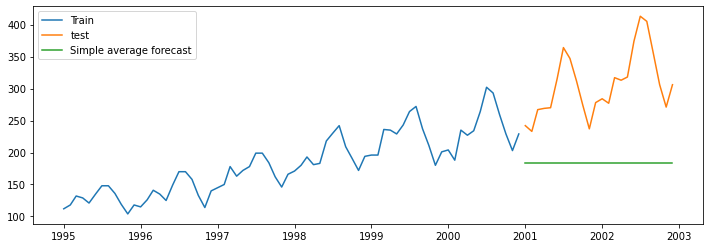

In [21]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.show()

# Calculating RMSE and MAPE Score For Simple Average Method

In [22]:
from sklearn.metrics import mean_squared_error

# RMSE

In [23]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg['avg_forecast'])).round(2)
rmse

132.43

# MAPE Score

In [24]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_avg['avg_forecast'])/test['Passengers'])*100),2)
mape

38.81

In [25]:
results = pd.DataFrame({'Method':['Simple Average Method'], 'RMSE':[rmse], 'MAPE':[mape]})
results

,Method,RMSE,MAPE
0,Simple Average Method,132.43,38.81


# Simple Moving Average Method

In [26]:
y_hat_sma = airline.copy()

In [27]:
ma_window = 12

In [28]:
y_hat_sma['sma_forecast'] = airline['Passengers'].rolling(ma_window).mean()

In [29]:
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

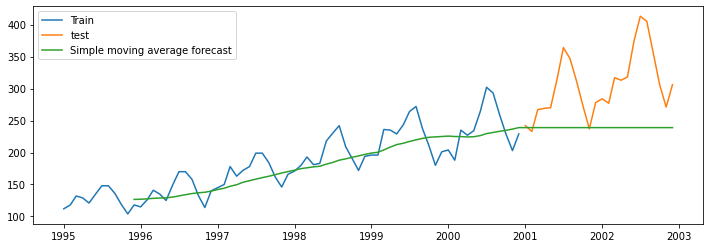

In [30]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.show()


# RMSE

In [31]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
rmse

82.89

# MAPE Score

In [32]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_sma['sma_forecast'][train_len:])/test['Passengers'])*100),2)
mape

20.34

In [33]:
results = results.append({'Method':'Simple moving average method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Simple Average Method,132.43,38.81
1,Simple moving average method,82.89,20.34


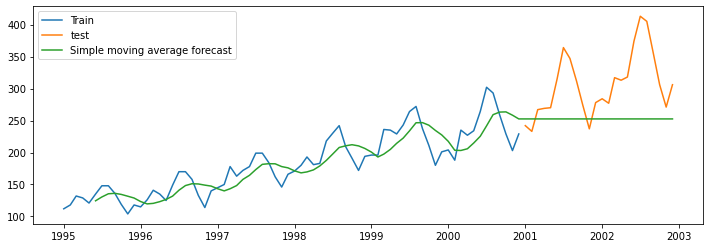

In [34]:
ma_window = 6
y_hat_sma['sma_forecast'] = airline['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.show()

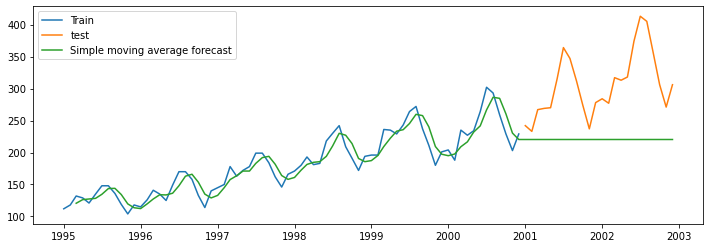

In [35]:
ma_window = 3
y_hat_sma['sma_forecast'] = airline['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.show()


# Simple Exponential Smoothning

In [36]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [37]:
# Instantiate the model
model = SimpleExpSmoothing(train['Passengers'])
# Fit the model with alpha = 0.2 
# optimized = False means, we are explicitly definign the smoothing_level.
# optimized = True means - Automitacially it will define a smoothing_level based on RMSE
model_fit = model.fit(smoothing_level = 0.2, optimized=True)
model_fit.params

C:\Users\Zoheb Kazi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


{'smoothing_level': 0.2,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 125.49455921789813,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [38]:
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

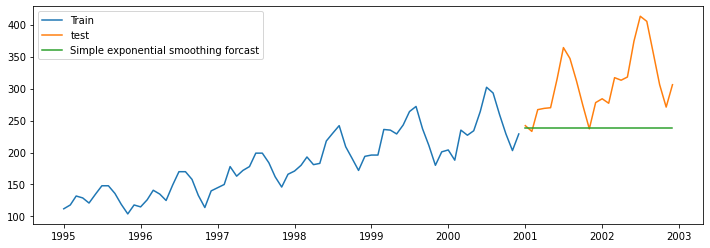

In [39]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

# RMSE

In [40]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ses['ses_forecast'])).round(2)
rmse

83.65

# MAPE Score

In [41]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_ses['ses_forecast'])/test['Passengers'])*100),2)
mape

20.59

In [42]:
results = results.append({'Method':'Simple exponential smoothing method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Simple Average Method,132.43,38.81
1,Simple moving average method,82.89,20.34
2,Simple exponential smoothing method,83.65,20.59


# Holt's Exponential Smoothing

In [43]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [44]:
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods = 12, trend='additive', seasonal=None)

In [45]:
model_fit = model.fit(smoothing_level = 0.2, smoothing_slope = 0.01, optimized=True)
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_trend': 0.01,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 116.47122080868294,
 'initial_trend': 1.7867824132003545,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [46]:
y_hat_holt = test.copy()
# We are forecasting for next 24 months
y_hat_holt['holt_forecast'] = model_fit.forecast(24)

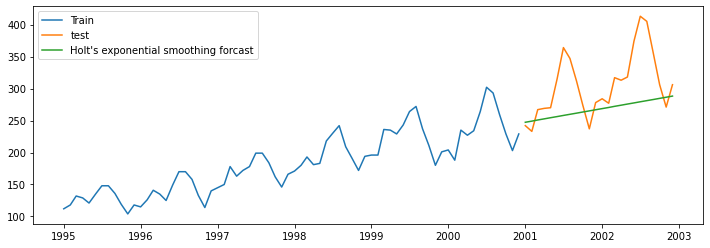

In [47]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

# RMSE

In [48]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_holt['holt_forecast'])).round(2)
rmse

58.21

# MAPE Score

In [49]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_holt['holt_forecast'])/test['Passengers'])*100),2)
mape

12.97

In [50]:
results = results.append({'Method':'Holt\'s exponential smoothing method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Simple Average Method,132.43,38.81
1,Simple moving average method,82.89,20.34
2,Simple exponential smoothing method,83.65,20.59
3,Holt's exponential smoothing method,58.21,12.97


# Holt-Winters's Exponential Smoothing

## Additive Method

In [51]:
y_hat_hwa = test.copy()

In [52]:
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods = 12, trend='additive', seasonal='additive')

In [53]:
model_fit = model.fit(optimized=True)

In [54]:
model_fit.params

{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': 6.6901861346559465e-09,
 'damping_trend': nan,
 'initial_level': 157.43334703668577,
 'initial_trend': 1.658291665311431,
 'initial_seasons': array([-47.09252227, -46.25095808, -21.74279645, -30.90119244,
        -33.55936117, -14.71761814,   4.62399716,   4.79895926,
        -20.35937319, -45.01779517, -67.67606308, -47.8342127 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [55]:
y_hat_hwa['hwa_forecast'] = model_fit.forecast(24)

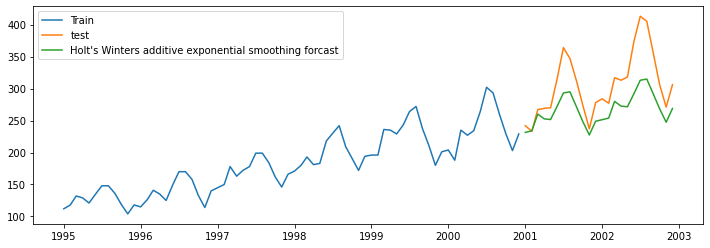

In [56]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_hwa['hwa_forecast'], label='Holt\'s Winters additive exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

# RMSE

In [57]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwa['hwa_forecast'])).round(2)
rmse

46.85

# MAPE Score

In [58]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_hwa['hwa_forecast'])/test['Passengers'])*100),2)
mape

11.84

In [59]:
results = results.append({'Method':'Holt\'s Winter additive method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Simple Average Method,132.43,38.81
1,Simple moving average method,82.89,20.34
2,Simple exponential smoothing method,83.65,20.59
3,Holt's exponential smoothing method,58.21,12.97
4,Holt's Winter additive method,46.85,11.84


## Multiplicative Method

In [60]:
y_hat_hwm = test.copy()

In [61]:
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods = 12, trend='add', seasonal='mul')

In [62]:
model_fit = model.fit(optimized=True)

In [63]:
model_fit.params

{'smoothing_level': 0.6241198300285694,
 'smoothing_trend': 8.422442066602975e-12,
 'smoothing_seasonal': 3.389894465320673e-12,
 'damping_trend': nan,
 'initial_level': 139.95510738731636,
 'initial_trend': 2.07485827083136,
 'initial_seasons': array([0.79328216, 0.79067549, 0.91613346, 0.87256977, 0.86284762,
        0.9503005 , 1.04203808, 1.0402251 , 0.91641716, 0.80394998,
        0.7007173 , 0.78894515]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [64]:
y_hat_hwm['hwm_forecast'] = model_fit.forecast(24)

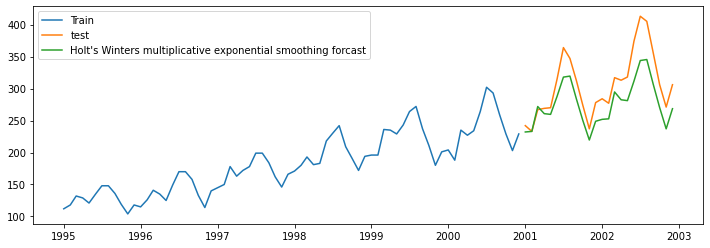

In [65]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='test')
plt.plot(y_hat_hwm['hwm_forecast'], label='Holt\'s Winters multiplicative exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

# RMSE

In [66]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwm['hwm_forecast'])).round(2)
rmse

34.98

# MAPE Score

In [67]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_hwm['hwm_forecast'])/test['Passengers'])*100),2)
mape

9.37

In [68]:
results = results.append({'Method':'Holt\'s Winter multiplicative method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Simple Average Method,132.43,38.81
1,Simple moving average method,82.89,20.34
2,Simple exponential smoothing method,83.65,20.59
3,Holt's exponential smoothing method,58.21,12.97
4,Holt's Winter additive method,46.85,11.84
5,Holt's Winter multiplicative method,34.98,9.37


# Auto Regressive Model (AR Model)

## 1. Visually checking the Stationarity

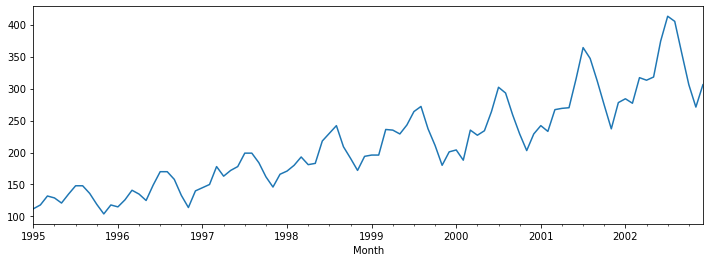

In [69]:
airline['Passengers'].plot(figsize=(12,4))
plt.show()

## 2. Augmented Dickey-Fuller (ADF) Test

In [70]:
from statsmodels.tsa.stattools import adfuller

In [71]:
adf_test = adfuller(airline['Passengers'])
adf_test

(1.340247959646701,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 626.0084713813505)

In [72]:
print('ADF stats: %f' % adf_test[0])
print('p-value: %f' %adf_test[1])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])

ADF stats: 1.340248
p-value: 0.996825
Critical value @ 0.05: -2.90


# Converting Non-Stationary to Stationary Time Series

## Box Cox Transformation

In [73]:
from scipy.stats import boxcox

In [74]:
data_boxcox = pd.Series(boxcox(airline['Passengers'], lmbda=0), airline.index)
data_boxcox.head()


Month
1995-01-01    4.718499
1995-02-01    4.770685
1995-03-01    4.882802
1995-04-01    4.859812
1995-05-01    4.795791
dtype: float64

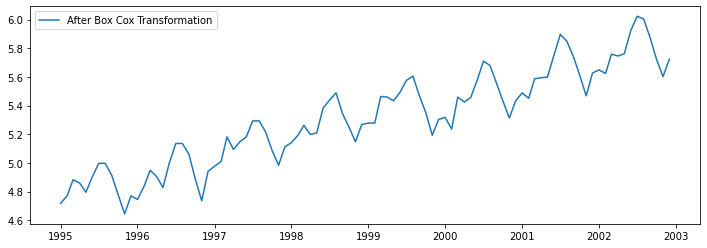

In [75]:
plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox Transformation')
plt.legend(loc='best')
plt.show()

# Differencing

In [76]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), index=airline.index)

In [77]:
data_boxcox_diff.dropna(inplace=True)

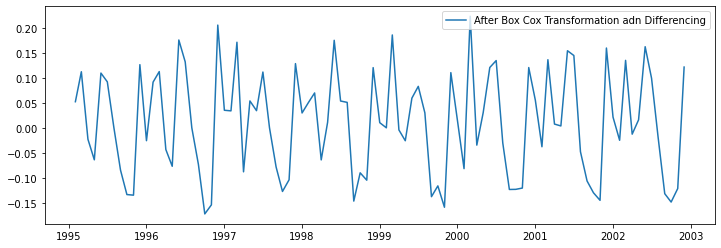

In [78]:
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation adn Differencing')
plt.legend(loc='best')
plt.show()

# ADF Test after Transformation

In [79]:
adf_test = adfuller(data_boxcox_diff)
adf_test

(-2.6708228902693834,
 0.07922469056630821,
 12,
 82,
 {'1%': -3.512738056978279,
  '5%': -2.8974898650628984,
  '10%': -2.585948732897085},
 -259.34387684331455)

In [80]:
print('ADF stats: %f' % adf_test[0])
print('p-value: %f' %adf_test[1])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])

ADF stats: -2.670823
p-value: 0.079225
Critical value @ 0.05: -2.90


# Auto-Correaltion Function

In [81]:
from statsmodels.graphics.tsaplots import plot_acf

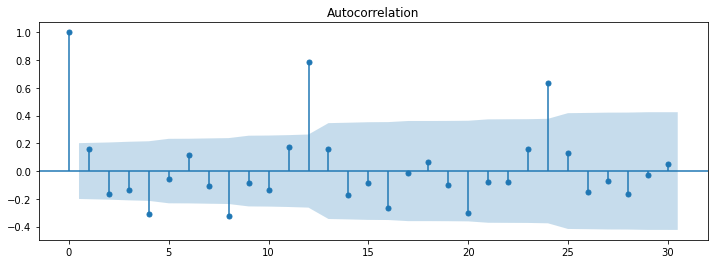

In [82]:
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

# Partial Autocorrelation Function (PACF)

In [83]:
from statsmodels.graphics.tsaplots import plot_pacf

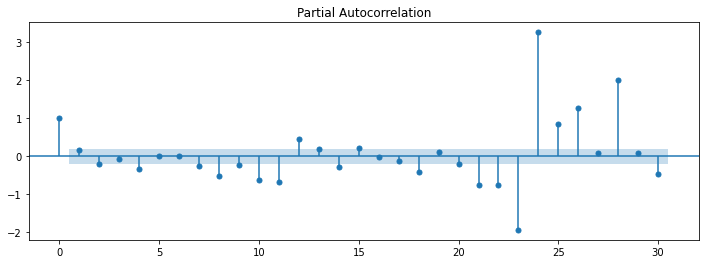

In [84]:
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

# Building Regression Model

## Splitting Stationary dataset into train and test set

In [85]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]

In [86]:
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

# Simple Auto Regressive Model (AR)

In [87]:
from statsmodels.tsa.arima_model import ARIMA

In [88]:
model = ARIMA(train_data_boxcox_diff, order=(1,0,0))

C:\Users\Zoheb Kazi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [89]:
model_fit = model.fit()
model_fit.params

const      0.010378
ar.L1.y    0.124503
dtype: float64

# Forecast

In [90]:
y_hat_ar = data_boxcox_diff.copy()

In [91]:
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

# Recover original time series forecast

In [92]:
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()

In [93]:
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])

In [94]:
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

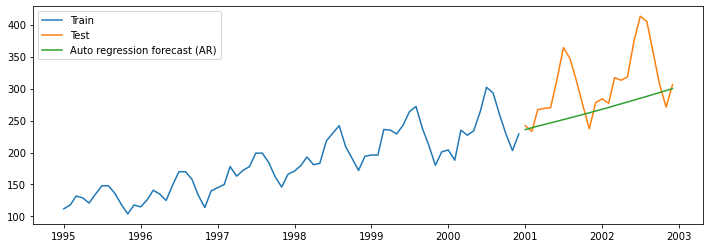

In [95]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()

# RMSE

In [96]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
rmse

57.9

# MAPE Score

In [97]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_ar['ar_forecast'][test.index.min():])/test['Passengers'])*100),2)
mape

13.09

In [98]:
results = results.append({'Method':'Auto regressive (AR) method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Simple Average Method,132.43,38.81
1,Simple moving average method,82.89,20.34
2,Simple exponential smoothing method,83.65,20.59
3,Holt's exponential smoothing method,58.21,12.97
4,Holt's Winter additive method,46.85,11.84
5,Holt's Winter multiplicative method,34.98,9.37
6,Auto regressive (AR) method,57.90,13.09


# Moving Average method (MA)

In [99]:
model = ARIMA(train_data_boxcox_diff, order=(0,0,1))

C:\Users\Zoheb Kazi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [100]:
model_fit = model.fit()
model_fit.params

const      0.010458
ma.L1.y    0.178301
dtype: float64

In [101]:
y_hat_ma = data_boxcox_diff.copy()

In [102]:
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

# Recover original time series forecast

In [103]:
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()

In [104]:
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])

In [105]:
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

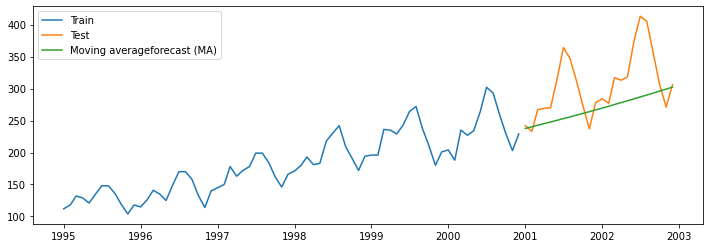

In [106]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving averageforecast (MA)')
plt.legend(loc='best')
plt.show()

# RMSE

In [107]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
rmse

56.7

# MAPE Score

In [108]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_ma['ma_forecast'][test.index.min():])/test['Passengers'])*100),2)
mape

12.68

In [109]:
results = results.append({'Method':'Moving average (MA) method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Simple Average Method,132.43,38.81
1,Simple moving average method,82.89,20.34
2,Simple exponential smoothing method,83.65,20.59
3,Holt's exponential smoothing method,58.21,12.97
4,Holt's Winter additive method,46.85,11.84
5,Holt's Winter multiplicative method,34.98,9.37
6,Auto regressive (AR) method,57.90,13.09
7,Moving average (MA) method,56.70,12.68


# Auto Regressive Moving Average (ARMA)

In [110]:
model = ARIMA(train_data_boxcox_diff, order=(1,0,1))

C:\Users\Zoheb Kazi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [111]:
model_fit = model.fit()
model_fit.params

const      0.010944
ar.L1.y    0.674262
ma.L1.y   -1.000000
dtype: float64

In [112]:
y_hat_arma = data_boxcox_diff.copy()

In [113]:
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

In [114]:
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()

In [115]:
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])

In [116]:
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

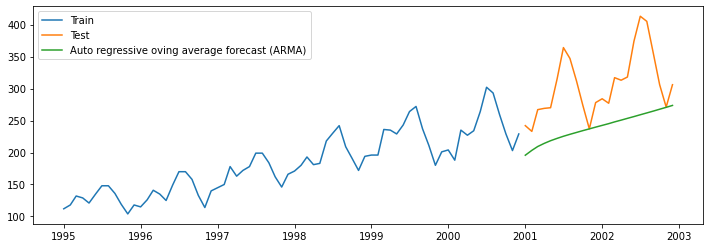

In [117]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='Auto regressive oving average forecast (ARMA)')
plt.legend(loc='best')
plt.show()

# RMSE

In [118]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_arma['arma_forecast'][test.index.min():])).round(2)
rmse

78.48

# MAPE Score

In [119]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_arma['arma_forecast'][test.index.min():])/test['Passengers'])*100),2)
mape

20.41

In [120]:
results = results.append({'Method':'Auto regressive moving average (ARMA) method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Simple Average Method,132.43,38.81
1,Simple moving average method,82.89,20.34
2,Simple exponential smoothing method,83.65,20.59
3,Holt's exponential smoothing method,58.21,12.97
4,Holt's Winter additive method,46.85,11.84
5,Holt's Winter multiplicative method,34.98,9.37
6,Auto regressive (AR) method,57.90,13.09
7,Moving average (MA) method,56.70,12.68
8,Auto regressive moving average (ARMA) method,78.48,20.41


# Auto Regressive Integrated Moving Average (ARIMA)

In [121]:
model = ARIMA(train_data_boxcox, order=(1,1,1))

C:\Users\Zoheb Kazi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Zoheb Kazi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [122]:
model_fit = model.fit()
model_fit.params

const        0.010944
ar.L1.D.y    0.674262
ma.L1.D.y   -1.000000
dtype: float64

In [123]:
y_hat_arima = data_boxcox_diff.copy()

In [124]:
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

In [125]:
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()

In [126]:
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])

In [127]:
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

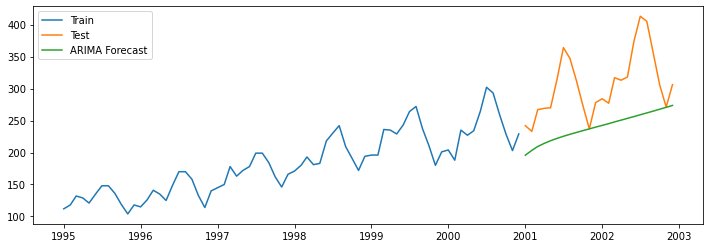

In [128]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA Forecast')
plt.legend(loc='best')
plt.show()

# RMSE

In [129]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
rmse

78.48

# MAPE Score

In [130]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_arima['arima_forecast'][test.index.min():])/test['Passengers'])*100),2)
mape

20.41

In [131]:
results = results.append({'Method':'ARIMA method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Simple Average Method,132.43,38.81
1,Simple moving average method,82.89,20.34
2,Simple exponential smoothing method,83.65,20.59
3,Holt's exponential smoothing method,58.21,12.97
4,Holt's Winter additive method,46.85,11.84
5,Holt's Winter multiplicative method,34.98,9.37
6,Auto regressive (AR) method,57.90,13.09
7,Moving average (MA) method,56.70,12.68
8,Auto regressive moving average (ARMA) method,78.48,20.41
9,ARIMA method,78.48,20.41


# Seasonal Auto Regressive Integrated Moving Average (SARIMA)

In [132]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [133]:
model = SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12))

C:\Users\Zoheb Kazi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Zoheb Kazi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [134]:
model_fit = model.fit()
model_fit.params

C:\Users\Zoheb Kazi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ar.L1       0.191938
ma.L1      -0.584191
ar.S.L12   -0.207384
ma.S.L12   -0.468047
sigma2      0.001821
dtype: float64

In [135]:
y_hat_sarima = data_boxcox_diff.copy()

# Reverse original time series forecast

In [136]:
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

In [137]:
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

In [138]:
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

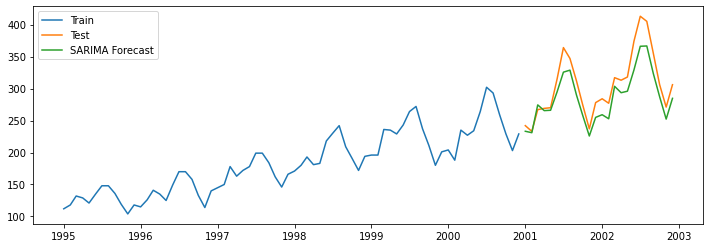

In [139]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()

# RMSE

In [140]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
rmse

24.09

# MAPE Score

In [141]:
mape = round(np.mean(np.abs((test['Passengers'] - y_hat_sarima['sarima_forecast'][test.index.min():])/test['Passengers'])*100),2)
mape

6.47

In [142]:
results = results.append({'Method':'SARIMA method', 'RMSE':rmse, 'MAPE':mape}, ignore_index=True)
results

,Method,RMSE,MAPE
0,Simple Average Method,132.43,38.81
1,Simple moving average method,82.89,20.34
2,Simple exponential smoothing method,83.65,20.59
3,Holt's exponential smoothing method,58.21,12.97
4,Holt's Winter additive method,46.85,11.84
5,Holt's Winter multiplicative method,34.98,9.37
6,Auto regressive (AR) method,57.90,13.09
7,Moving average (MA) method,56.70,12.68
8,Auto regressive moving average (ARMA) method,78.48,20.41
9,ARIMA method,78.48,20.41


# Analysis
We Can see SARIMA Model is having low RMSE and low MAPE Score and this model is used for further forecasting